In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
plt.rcParams.update({
    'figure.figsize': (4.8, 2.7), 'font.size': 15, 'lines.linewidth': 2,
    'xtick.labelsize': 'small', 'ytick.labelsize': 'small',
    'axes.spines.top': False, 'axes.spines.right': False,
    'savefig.dpi': 600,
})

import numpy as np

rng = np.random.default_rng()

# Build an arena

Position inside arena will be discretized according to a hexagonal grid.

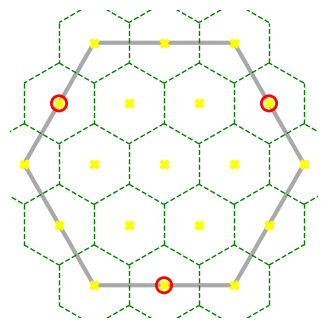

In [2]:
from hexarena.arena import Arena

arena = Arena(2)
fig, ax = plt.subplots(figsize=(4, 4))
arena.plot_map(ax)
fig.savefig('arena-map.png', bbox_inches='tight')

# Build a food box

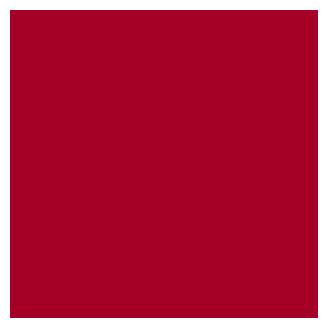

In [3]:
from hexarena.box import FoodBox

box = FoodBox(num_grades=20, num_patches=25, sigma=0.2)
box.reset()

fig, ax = plt.subplots(figsize=(4, 4))
h = ax.imshow(box.colors, vmin=0, vmax=box.num_grades-1, cmap='RdYlBu_r')
ax.set_axis_off()

def init():
    box.reset()
    box.step(1)
    h.set_data(box.colors)
    return h,

def update(i):
    box.step(0)
    h.set_data(box.colors)
    return h,

num_frames = 80
ani = FuncAnimation(fig, update, frames=range(num_frames), init_func=init, blit=True)
ani.save('color-cues.gif', writer='pillow')

# Build a foraging environment

In [4]:
from hexarena.env import ForagingEnv

box = {'num_grades': 6, 'num_patches': 4}
env = ForagingEnv(
    arena={'resol': 2},
    boxes=[dict(rate=rate, **box) for rate in [1/15, 1/21, 1/35]],
    monkey={'move_price': 0.},
)

In [5]:
episode = {
    'observation': [], 'action': [], 'reward': [],
    'pos': [], 'gaze': [],
    'foods': [], 'cues': [], 'colors': [],
}

def append_data(init=False):
    episode['observation'].append(observation)
    for key in info:
        episode[key].append(info[key])
    if not init:
        episode['action'].append(action)
        episode['reward'].append(reward)

observation, info = env.reset()
append_data(init=True)
for _ in range(100):
    action = env.action_space.sample()
    observation, reward, _, _, info = env.step(action)
    append_data()

for key in episode:
    episode[key] = np.array(episode[key])